# Marine Heatwaves in a warming Mediterranean Sea

A temporale analysis

Simon Oiry\[^13\] [](https://orcid.org/0000-0001-7161-5246) (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France, Consiglio Nazionale delle Ricerche, Istituto di Scienze Marine (CNR-ISMAR), 00133 Rome, Italy)  
Maria Laura Zoffoli\[^14\] [](https://orcid.org/0000-0003-1892-0051)Christian Marchese\[^15\] [](https://orcid.org/0000-0002-2414-9251) (Consiglio Nazionale delle Ricerche, Istituto di Scienze Marine (CNR-ISMAR), 00133 Rome, Italy)  
Laurent Barillé\[^16\] [](https://orcid.org/0000-0001-5138-2684) (Institut des Substances et Organismes de la Mer, ISOMer, Nantes Université, UR 2160, F-44000 Nantes, France)  
July 16, 2025

TBD

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attachement du package : 'tidyterra'

L'objet suivant est masqué depuis 'package:stats':

    filter

terra 1.8.50

Attachement du package : 'terra'

L'objet suivant est masqué depuis 'package:tidyr':

    extract


Attachement du package : 'patchwork'

L'objet suivant est masqué depuis 'package:terra':

    area


Attachement du package : 'gridExtra'

L'objet suivant est masqué depuis 'package:dplyr':

    combine


Attachement du package : 'ggrastr'

L'objet suivant est masqué depuis 'package:terra':

    rasterize

Le chargement a nécessité le package : cowplot

Attachement du package : 'cowplot'

L'objet suivant est masqué depuis 'package:patchwork':

    align_plots

L'objet suivant est masqué depuis 'package:lubridate':

    stamp

Le chargement a nécessité le package : magrittr

Attachement du package : 'magrittr'

Les objets suivants sont masqués depuis 'package:terra':

    extract, inset

L'objet suivant est masqué depuis 'package:purrr':

    set_names

L'objet suivant est masqué depuis 'package:tidyr':

    extract

# Introduction

Marine heatwaves (MHWs) are discrete and prolonged periods of anomalously high sea temperatures that significantly exceed historical baseline conditions. Specifically, a marine heatwave is generally defined as an event lasting five or more consecutive days during which sea temperatures exceed the 90th percentile threshold based on a 30-year historical climatological period (@fig-HW_explain). These events can vary in terms of duration, intensity, and spatial extent, making a flexible yet rigorous approach necessary for accurate characterization and comparison.

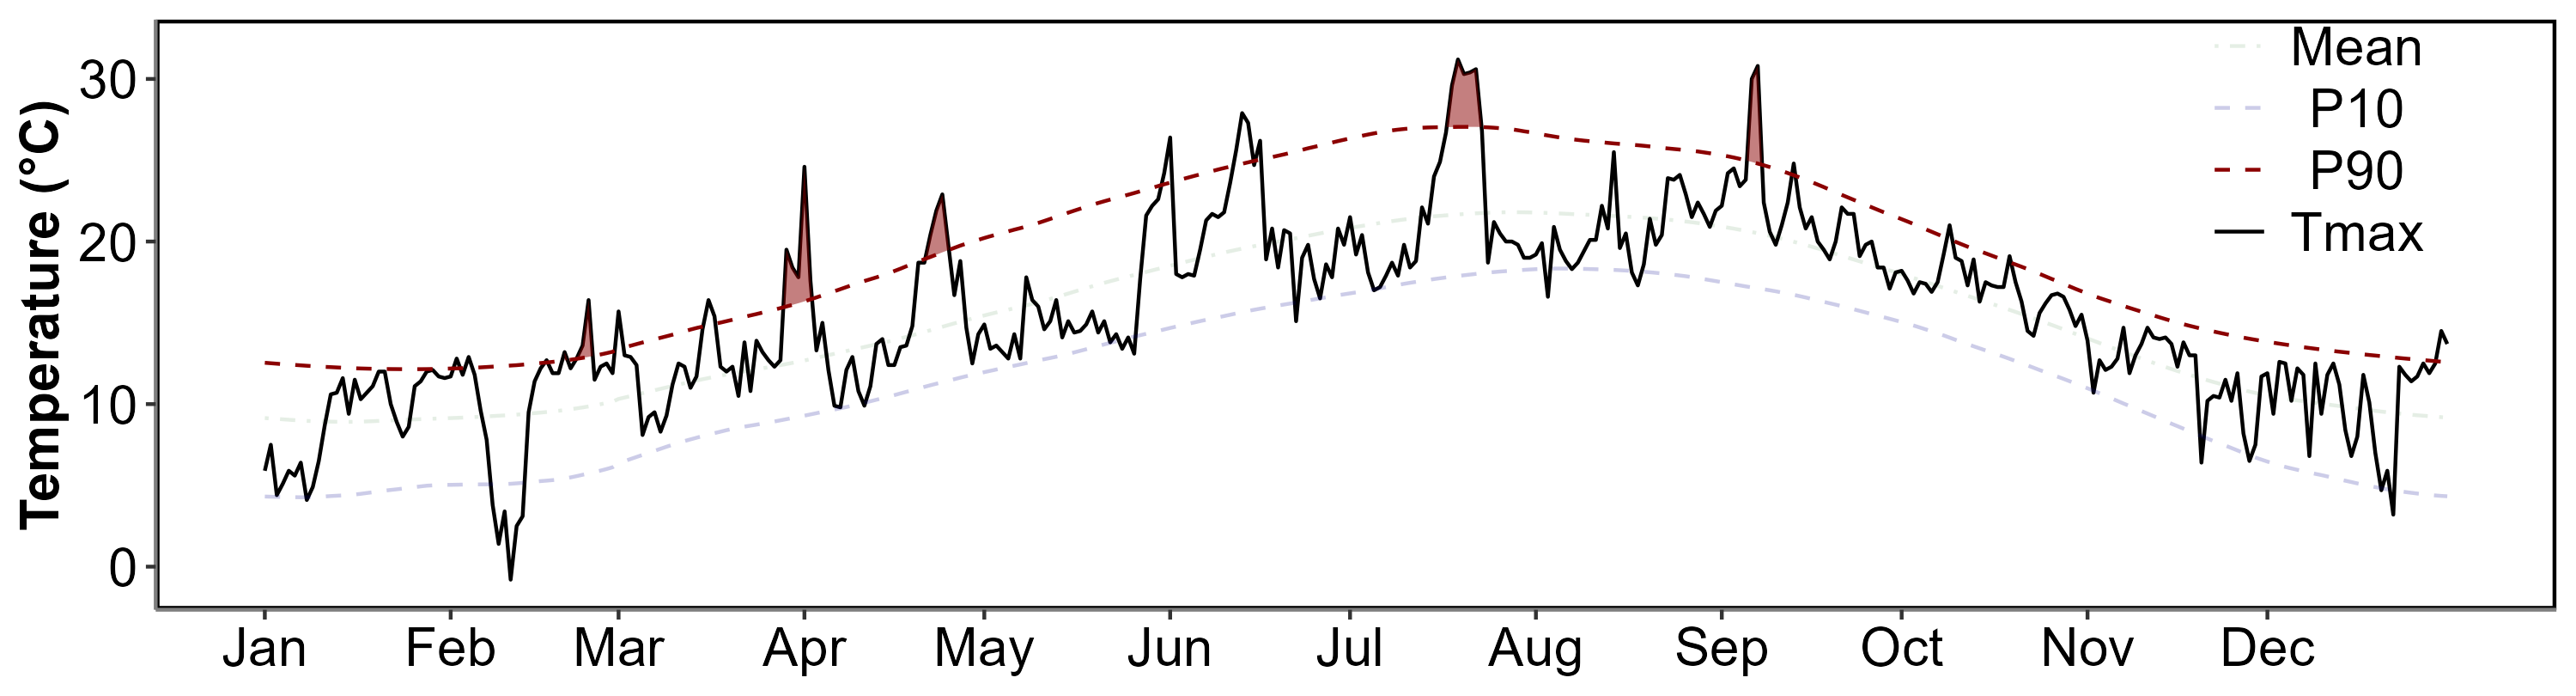

In [ ]:
knitr::include_graphics("Figs/plot_Tmax_flame.png")

The importance of studying marine heatwaves arises from their profound ecological and socioeconomic impacts. They have been associated with widespread disruptions to marine ecosystems, including shifts in species distribution, local extinctions, significant mortality events, and changes in primary productivity. Such ecological disturbances subsequently affect fisheries, aquaculture, and biodiversity, highlighting the broad-reaching implications of these events.

The Mediterranean Sea, characterized as a climate change hotspot, has witnessed an increased frequency and intensity of marine heatwaves, especially over recent decades. Mediterranean MHWs often coincide with atmospheric heatwaves, further exacerbating their intensity and ecological impacts. Concurrent atmospheric and marine heatwaves amplify sea surface temperature anomalies, leading to intense ocean stratification and extensive ecological disruption, including mass mortalities of benthic invertebrates and seagrass decline.

In the Mediterranean, particularly in the Adriatic Sea, studies have documented variable responses of primary productivity to MHW events. In coastal and eutrophic regions, such as areas influenced by riverine nutrient input, MHWs have resulted in increased phytoplankton biomass. Conversely, offshore and oligotrophic regions typically exhibit reduced chlorophyll-a concentrations during heatwaves, indicating a potential decline in phytoplankton productivity. Such spatial heterogeneity emphasizes the complexity of ecological responses and underscores the importance of localized assessments.

Understanding marine heatwaves, particularly in sensitive regions like the Mediterranean Sea, is crucial for developing informed management strategies aimed at mitigating their ecological and socioeconomic consequences. This necessity is heightened by projections indicating further increases in MHW frequency, duration, and intensity, driven by ongoing climate change.

# Material & Methods

Daily Sea Surface Temperature (SST) time series for the Mediterranean Sea, spanning from 1982 onwards, were obtained from the Copernicus Marine Environment Monitoring Service (CMEMS) platform \[@Copernicus_Sentinel; @pisano2016new; @embury2024satellite\]. Heatwave events were detected using the HeatwaveR package in R \[@heatwaveR\], adhering to the marine heatwave definition provided by @hobday2016hierarchical and @hobday2018categorizing.

To establish a reference climatology, the first 30 years of the dataset were utilized for each pixel within the Mediterranean Sea. Daily SST values were subsequently compared against this baseline climatology. A heatwave event was identified whenever the daily SST exceeded the 90th percentile of the corresponding climatological distribution. Additionally, consecutive events separated by fewer than two days were merged and treated as a single continuous heatwave event.

Results are presented as annual maps of key heatwave metrics: the total number of days classified as heatwave, the number of distinct heatwave events, and the cumulative intensity of these events, defined as the sum of daily SST exceedances above the climatological 90th percentile threshold.

In [ ]:
library(sf)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(tidyverse)
library(ggspatial)

region_col <- c(
  # greens
  "Levantine Sea" = "#008F1A",   # brighter pine-green
  "Sea of Sicily" = "#6B9C3C",   # vivid olive-sage
  
  # blues / teals / purples
  "Alboran Sea"   = "#414E7C",   # richer slate-blue
  "Gulf of Lyon"  = "#266A78",   # clearer Mediterranean teal
  "Adriatic sea"  = "#583C68",   # deeper indigo-violet
  
  # yellows / ochres
  "Balearic Sea"  = "#A98C3D",   # crisp mustard-ochre
  "Aegean Sea"    = "#D7A543",   # sun-baked golden-ochre
  
  # reds / oranges / browns
  "Tyrrhenian Sea"= "#A02A2A",   # vivid brick-red
  "Algerian Sea"  = "#DF5513",   # bright burnt-orange
  "Ionian Sea"    = "#705943"    # warmer earthy-taupe
)

# Load your shapefile (replace with your path)
med_regions <- st_read("Data/mask_Med_Sea/More_regions_Med_Sea.shp") %>% 
  dplyr::filter(!str_detect(name, "Black"))

# Get world land polygons
world <- ne_countries(scale = "large", returnclass = "sf")

# Plot
plot_medsea <- ggplot() +
  # Plot land as grey
  geom_sf(data = world, fill = "grey80", color = NA) +
  # Plot Mediterranean regions, each with a different color
  geom_sf(data = med_regions, aes(fill = name), color = "black", alpha = 0.8) +
  # Customize colors
  scale_fill_manual(name = "",values = region_col)  +
    ## ── horizontal guide with title on top ──────────────────────
  guides(
    fill = guide_legend(
      ncol = 1,
      byrow      = TRUE,
      title.position = "top",
      label.position = "right",            # optional – labels below bar
      barwidth       = unit(0.7, "cm"),       # tweak length
      barheight      = unit(0.7, "cm")# tweak thickness
    )
  ) +
  ## ── map extent ──────────────────────────────────────────────
  coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +
  ## ── *** scale bar *** ───────────────────────────────────────
  annotation_scale(
    location   = "bl",   # bottom-left
    width_hint = 0.25,   # ≈25 % of the map width
    line_width = 0.6,
    text_cex   = 2,
    pad_x      = unit(0.4, "cm"),
    pad_y      = unit(0.4, "cm")
  ) +
  ## ── theme ───────────────────────────────────────────────────
  theme_minimal(base_size = 18) +
  theme(
    panel.grid        = element_line(color = "gray90"),
    panel.background  = element_rect(fill = "aliceblue"),
    plot.background   = element_rect(fill = "white", color = NA),

    # move legend INSIDE, upper-left; anchor by its top-left corner
    legend.position       = c(0.02, 0.98),   # npc coords (x = 2 %, y = 98 %)
    legend.justification  = c(0, 1),
    # legend.direction      = "horizontal",
    legend.direction      = "vertical",      # keeps items vertical
    legend.title.align    = 0.5,             # centre title
    legend.text           = element_text(size = 13),
    legend.title = element_blank(),

    # give legend a white background & a bit of padding
    legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA,linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4)
  )

plot_medsea

ggsave("Manuscript/Figs/Map_MedSea.png", plot_medsea, dpi = 300, height =645*3, width = 1319*3, units = "px")

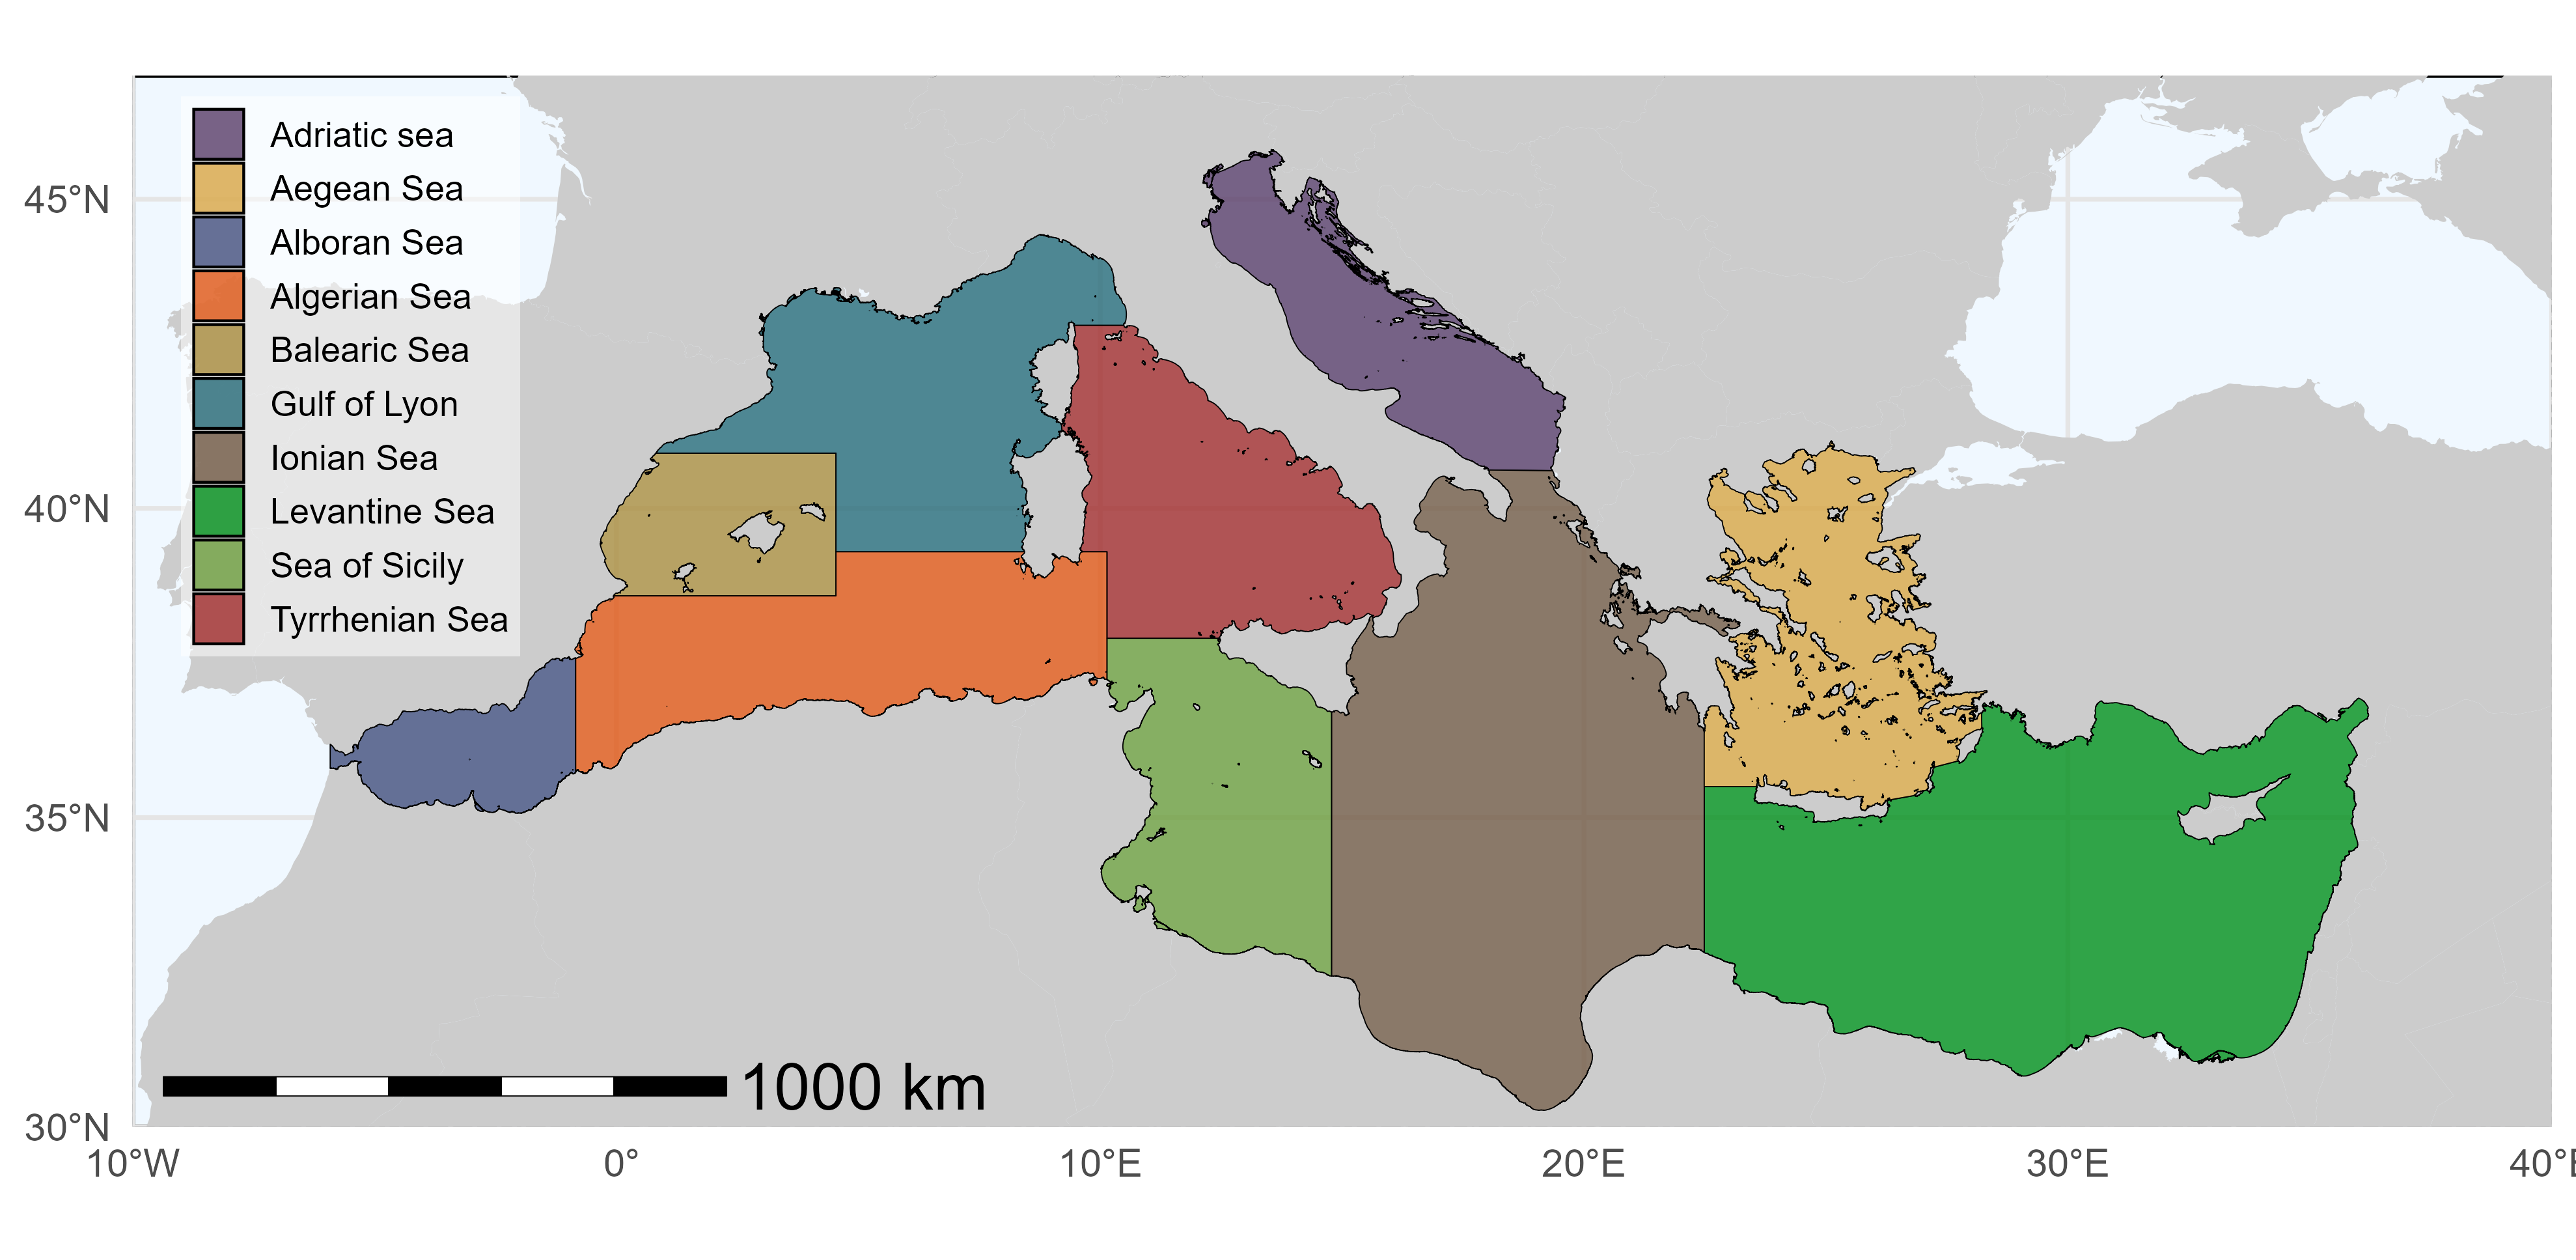

In [ ]:
knitr::include_graphics("Figs/Map_MedSea.png")

HW metrics where summerised for each regions of the Mediterranean sea, following the nomenclature defined by the Marine Strategy Framework Directive (MSFD, @fig-MapMedSea).

# Results

## SST phenology

### Maps

In [ ]:
library(data.table)
library(dtplyr)
library(tidyverse)
library(dplyr)
library(duckdb)

List_HW_csv <- list.files("Outputs/SST/Cropped_CSV/", pattern = ".csv",recursive = T, full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(filename = gsub(".*/","",path),
         Date = as.Date(substr(filename,1,8), format = "%Y%m%d"), 
         doy = yday(Date))


for (i in unique(List_HW_csv$doy)) {
  
  print(i)
  
  List <- List_HW_csv %>% 
    dplyr::filter(doy == i)
  
  
  # Create a progress bar
  pb <- txtProgressBar(min = 0, max = nrow(List), style = 3)
  
  # Efficiently read all CSV files and combine them into a single data.table with progress bar
  all_data <- rbindlist(lapply(seq_along(List$path), function(i) {
    # Update the progress bar
    setTxtProgressBar(pb, i)
    
    # Read the CSV file
    fread(List$path[i])
  }), use.names = TRUE, fill = TRUE)
  
  # Close the progress bar
  close(pb)
  
  
  split1 <- all_data %>% 
    mutate(year = year(date)) %>% 
    dplyr::filter(year <= 1991) %>% 
    mutate(split = "1982-1991")
  
  split2 <- all_data %>% 
    mutate(year = year(date)) %>% 
    dplyr::filter(year > 1991 & year <= 2001)%>% 
    mutate(split = "1992-2001")
  
  split3 <- all_data %>% 
    mutate(year = year(date)) %>% 
    dplyr::filter(year > 2001 & year <= 2011)%>% 
    mutate(split = "2002-2011")
  
  split4 <- all_data %>% 
    mutate(year = year(date)) %>% 
    dplyr::filter(year > 2011)%>% 
    mutate(split = "2012-2024")
  
  df_by_split <- all_data %>% 
    mutate(year = year(date),
           split = "all") %>% 
    rbind(split1, split2, split3, split4)
  
  # pheno_date <- df_by_split %>% 
  #   group_by(x,y,split) %>% 
  #   reframe(mean = mean(analysed_sst, na.rm = T),
  #           median = median(analysed_sst, na.rm = T),
  #           sd = sd(analysed_sst, na.rm = T),
  #           p05 = quantile(analysed_sst, probs = 0.05),
  #           p25 = quantile(analysed_sst, probs = 0.25),
  #           p75 = quantile(analysed_sst, probs = 0.75),
  #           p95 = quantile(analysed_sst, probs = 0.95)
  # )
  
  
  # Create a temporary DuckDB connection
con <- dbConnect(duckdb::duckdb(), dbdir = ":memory:")

# Copy the tibble to DuckDB as a lazy table
df_lazy <- copy_to(con, df_by_split, temporary = TRUE)

# Now summarise using lazy evaluation
pheno_date <- df_lazy %>%
  group_by(x, y, split) %>%
  summarise(
    mean   = mean(analysed_sst, na.rm = TRUE),
    median = median(analysed_sst, na.rm = TRUE),
    sd     = sd(analysed_sst, na.rm = TRUE),
    p05    = quantile(analysed_sst, 0.05),
    p25    = quantile(analysed_sst, 0.25),
    p75    = quantile(analysed_sst, 0.75),
    p95    = quantile(analysed_sst, 0.95),
    .groups = "drop"
  ) %>%
  collect() %>% 
  mutate(doy = i)# Pull results back into R
  
rm(con)
rm(df_lazy)

fwrite(pheno_date, paste0("Outputs/SST/SST_Phenology/doy/", "SST_Pheno_DOY_",i,".csv"))
}

In [ ]:
library(sf)
library(rnaturalearth)
library(data.table)
library(viridis)
library(tidyterra)
library(ggpp)



filelist <- list.files("Outputs/SST/SST_Phenology/doy/", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         doy = gsub("[^0-9]","",file) %>% 
           as.numeric()) %>% 
  arrange(doy)


# Initialize min and max
global_min <- Inf
global_max <- -Inf

# Loop through files
for (file in filelist$path) {
  # Read only the column you need (e.g., "SST")
  dt <- fread(file, select = "mean", showProgress = FALSE)
  
  # Update global min and max
  global_min <- min(global_min, min(dt$mean, na.rm = TRUE))
  global_max <- max(global_max, max(dt$mean, na.rm = TRUE))
}

# Output
cat("Global min SST:", global_min, "\n")
cat("Global max SST:", global_max, "\n")


region_col <- c(
  # greens
  "Levantine Sea" = "#008F1A",   # brighter pine-green
  "Sea of Sicily" = "#6B9C3C",   # vivid olive-sage
  
  # blues / teals / purples
  "Alboran Sea"   = "#414E7C",   # richer slate-blue
  "Gulf of Lyon"  = "#266A78",   # clearer Mediterranean teal
  "Adriatic sea"  = "#583C68",   # deeper indigo-violet
  
  # yellows / ochres
  "Balearic Sea"  = "#A98C3D",   # crisp mustard-ochre
  "Aegean Sea"    = "#D7A543",   # sun-baked golden-ochre
  
  # reds / oranges / browns
  "Tyrrhenian Sea"= "#A02A2A",   # vivid brick-red
  "Algerian Sea"  = "#DF5513",   # bright burnt-orange
  "Ionian Sea"    = "#705943"    # warmer earthy-taupe
)
# Load your shapefile (replace with your path)
med_regions <- st_read("Data/mask_Med_Sea/More_regions_Med_Sea.shp") %>% 
  dplyr::filter(!str_detect(name, "Black"))

# Get world land polygons
world <- ne_countries(scale = "large", returnclass = "sf")


#### Plot clock 


# Define DOY
doy <- 1:366
df <- tibble(
  doy = doy,
  angle = -2 * pi * (doy / 366) + pi/2,   # clockwise + 90° rotation
  # angle = -2 * pi * (doy / 366), 
  x = cos(angle),
  y = sin(angle)
)

# Define 15th of each month
dates <- ymd("2024-01-15") + months(0:11)
month_labels <- tibble(
  month = lubridate::month(dates, label = TRUE, locale = "UTC"),
  doy = yday(dates),
  angle = -2 * pi * (doy / 366) + pi/2,
  x = 0.8 * cos(angle),  # inside the circle
  y = 0.8 * sin(angle)
)

# Ticks at 1st of each month
dates_ticks <- ymd("2024-01-01") + months(0:11)
month_ticks <- tibble(
  doy = yday(dates_ticks),
  angle = -2 * pi * (doy / 366) + pi/2,
  x_start = 0.95 * cos(angle),
  y_start = 0.95 * sin(angle),
  x_end = 1.05 * cos(angle),
  y_end = 1.05 * sin(angle)
)


# Plot
raw_clock <- ggplot(df, aes(x = x, y = y)) +
  geom_path(linewidth = 1, color = "steelblue") +
  geom_segment(data = month_ticks, aes(x = x_start, y = y_start, xend = x_end, yend = y_end),
               linewidth = 0.8, color = "black") +
  geom_text(data = month_labels, aes(label = month), size = 4) +
  coord_equal() +
  theme_void()


output_plots <- "Outputs/SST/SST_Phenology/plots/"

for (i in filelist$doy) {
  
  df <- fread(filelist$path[i])
  
  angle_today <- -2 * pi * (i / 366) + pi/2
  point_today <- tibble(
    x = 1.0 * cos(angle_today),
    y = 1.0 * sin(angle_today)
  )  
  
  plot_clock <- raw_clock + 
      geom_point(data = point_today, aes(x = x, y = y), color = "red", size = 4) 
  
  clock_grob <- ggplotGrob(plot_clock)
  
  for (ii in unique(df$split)) {
    
    df_split <- df %>% 
      dplyr::filter(split == ii)
    
    map <- ggplot() +
      geom_tile(data = df_split, mapping = aes(x = x, y = y, fill = mean))+
      geom_sf(data = world, fill = "grey80", color = NA) +
      scale_fill_grass_c("celsius",
                         use_grass_range = FALSE,
                         limits = c(global_min,global_max),
                         name     = paste0("Avg SST (", ii, ")"))+
      ## ── colour scales ───────────────────────────────────────────
      # scale_fill_gradientn(
      #   colours  = turbo(5),
      #   na.value = "transparent",
      #   name     = "Avg number of Event per Year",
      #   limits = c(10,15)
      # ) +
        ## ── horizontal guide with title on top ──────────────────────
      guides(
        fill = guide_colourbar(
          direction      = "horizontal",
          title.position = "top",
          label.position = "bottom",            # optional – labels below bar
          barwidth       = unit(9.5, "cm"),       # tweak length
          barheight      = unit(0.45, "cm")     # tweak thickness
        )
      ) +
      ## ── map extent ──────────────────────────────────────────────
      coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +
      ## ── *** scale bar *** ───────────────────────────────────────
      annotation_scale(
        location   = "bl",   # bottom-left
        width_hint = 0.25,   # ≈25 % of the map width
        line_width = 0.6,
        text_cex   = 2,
        pad_x      = unit(0.4, "cm"),
        pad_y      = unit(0.4, "cm")
      ) +
      ## ── theme ───────────────────────────────────────────────────
      theme_minimal(base_size = 18) +
      theme(
        panel.grid        = element_line(color = "gray90"),
        panel.background  = element_rect(fill = "aliceblue"),
        plot.background   = element_rect(fill = "white", color = NA),
    
        # move legend INSIDE, upper-left; anchor by its top-left corner
        legend.position       = c(0.02, 0.98),   # npc coords (x = 2 %, y = 98 %)
        legend.justification  = c(0, 1),
        legend.direction      = "horizontal",
    
        legend.title.align    = 0.5,             # centre title
        legend.text           = element_text(size = 13),
    
        # give legend a white background & a bit of padding
        legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA,linewidth = 0.2),
        legend.margin         = margin(4, 4, 4, 4),
        axis.title = element_blank()
      ) +
  annotation_custom(
    grob  = clock_grob,
    xmin  = -9,   # change as needed for position
    xmax  = -1,   # define width
    ymin  = 36,   # change as needed for vertical placement
    ymax  = 44    # define height
  )
    
    ggsave(paste0(output_plots,"/",ii,"/map_",ii,"_DOY_",i,".png"),map,dpi = 300, height =575*3, width = 1319*3, units = "px")
  }
  
}

In [ ]:
library(tidyverse)
library(magick)

files <- list.files("Outputs/SST/SST_Phenology/plots/1982-1991", pattern = ".png", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  pull(path)

gifski::gifski(files, gif_file = "Outputs/SST/SST_Phenology/plots/gif/GIF_1982-1991.gif",
               delay = 0.1, loop = TRUE, progress = TRUE,width=3957/4,height=1725/4)

files <- list.files("Outputs/SST/SST_Phenology/plots/1992-2001", pattern = ".png", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  pull(path)

gifski::gifski(files, gif_file = "Outputs/SST/SST_Phenology/plots/gif/GIF_1992-2001.gif",
               delay = 0.1, loop = TRUE, progress = TRUE,width=3957/4,height=1725/4)

files <- list.files("Outputs/SST/SST_Phenology/plots/2002-2011", pattern = ".png", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  pull(path)

gifski::gifski(files, gif_file = "Outputs/SST/SST_Phenology/plots/gif/GIF_2002-2011.gif",
               delay = 0.1, loop = TRUE, progress = TRUE,width=3957/4,height=1725/4)

files <- list.files("Outputs/SST/SST_Phenology/plots/2012-2024", pattern = ".png", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  pull(path)

gifski::gifski(files, gif_file = "Outputs/SST/SST_Phenology/plots/gif/GIF_2012-2024.gif",
               delay = 0.1, loop = TRUE, progress = TRUE,width=3957/4,height=1725/4)


#### COmbine 

gif_list1 <- list.files("Outputs/SST/SST_Phenology/plots/1982-1991", full.names = T) %>% 
  as_tibble() %>% 
  rename(split1 = "value") %>% 
  mutate(file = gsub(".*/","",split1),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  dplyr::select(-file)

gif_list2 <- list.files("Outputs/SST/SST_Phenology/plots/2012-2024", full.names = T) %>% 
  as_tibble() %>% 
  rename(split2 = "value") %>% 
  mutate(file = gsub(".*/","",split2),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  dplyr::select(-file)

df_list <- gif_list1 %>% 
  left_join(gif_list2, by = "num")

for (i in df_list$num) {
  
  img1 <- image_read(df_list$split1[i])
  img2 <- image_read(df_list$split2[i])

  combo <- image_append(c(img1, img2),   stack = TRUE)   # one above the other

  image_write(combo, path = paste0("Outputs/SST/SST_Phenology/plots/Merged/combo_",i,".png"))
}

files <- list.files("Outputs/SST/SST_Phenology/plots/Merged", pattern = ".png", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  pull(path)

gifski::gifski(files, gif_file = "Outputs/SST/SST_Phenology/plots/gif/Merged_1982-1991-2012-2024.gif",
               delay = 0.1, loop = TRUE, progress = TRUE,width=3957/2,height=3450/2)

### Compare 1982-1991 to 2012-2024

In [ ]:
library(sf)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(tidyverse)
library(terra)
library(viridisLite)
library(ggspatial)
library(Utilities.Package)
library(tidyterra)

filelist <- list.files("Outputs/SST/SST_Phenology/doy/", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         doy = gsub("[^0-9]","",file) %>% 
           as.numeric()) %>% 
  arrange(doy)


for (i in filelist$doy) {
  
  df <- fread(filelist$path[i]) %>% 
    dplyr::filter(split %in% c("1982-1991","2012-2024")) %>% 
    dplyr::select(x,y,split,mean) %>% 
    pivot_wider(names_from = split, values_from = mean) %>% 
    mutate(diff = `2012-2024` - `1982-1991`, 
           doy = i) %>%
    dplyr::select(x,y,diff,doy)
    

  fwrite(df,paste0("Outputs/SST/SST_Phenology/diff_splits/Diff_1982-1991-2012-2024_DOY_",i,".csv"))
}



filelist <- list.files("Outputs/SST/SST_Phenology/diff_splits/", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         doy = gsub(".*_","",file) %>% gsub(".csv","",.) %>% 
           as.numeric()) %>% 
  arrange(doy)


# Initialize min and max
global_min <- Inf
global_max <- -Inf

# Loop through files
for (file in filelist$path) {
  # Read only the column you need (e.g., "SST")
  dt <- fread(file, select = "diff", showProgress = FALSE)
  
  # Update global min and max
  global_min <- min(global_min, min(dt$diff, na.rm = TRUE))
  global_max <- max(global_max, max(dt$diff, na.rm = TRUE))
}


region_col <- c(
  # greens
  "Levantine Sea" = "#008F1A",   # brighter pine-green
  "Sea of Sicily" = "#6B9C3C",   # vivid olive-sage
  
  # blues / teals / purples
  "Alboran Sea"   = "#414E7C",   # richer slate-blue
  "Gulf of Lyon"  = "#266A78",   # clearer Mediterranean teal
  "Adriatic sea"  = "#583C68",   # deeper indigo-violet
  
  # yellows / ochres
  "Balearic Sea"  = "#A98C3D",   # crisp mustard-ochre
  "Aegean Sea"    = "#D7A543",   # sun-baked golden-ochre
  
  # reds / oranges / browns
  "Tyrrhenian Sea"= "#A02A2A",   # vivid brick-red
  "Algerian Sea"  = "#DF5513",   # bright burnt-orange
  "Ionian Sea"    = "#705943"    # warmer earthy-taupe
)
# Load your shapefile (replace with your path)
med_regions <- st_read("Data/mask_Med_Sea/More_regions_Med_Sea.shp") %>% 
  dplyr::filter(!str_detect(name, "Black"))

# Get world land polygons
world <- ne_countries(scale = "large", returnclass = "sf")


#### Plot clock 


# Define DOY
doy <- 1:366
df <- tibble(
  doy = doy,
  angle = -2 * pi * (doy / 366) + pi/2,   # clockwise + 90° rotation
  # angle = -2 * pi * (doy / 366), 
  x = cos(angle),
  y = sin(angle)
)

# Define 15th of each month
dates <- ymd("2024-01-15") + months(0:11)
month_labels <- tibble(
  month = lubridate::month(dates, label = TRUE, locale = "UTC"),
  doy = yday(dates),
  angle = -2 * pi * (doy / 366) + pi/2,
  x = 0.8 * cos(angle),  # inside the circle
  y = 0.8 * sin(angle)
)

# Ticks at 1st of each month
dates_ticks <- ymd("2024-01-01") + months(0:11)
month_ticks <- tibble(
  doy = yday(dates_ticks),
  angle = -2 * pi * (doy / 366) + pi/2,
  x_start = 0.95 * cos(angle),
  y_start = 0.95 * sin(angle),
  x_end = 1.05 * cos(angle),
  y_end = 1.05 * sin(angle)
)


# Plot
raw_clock <- ggplot(df, aes(x = x, y = y)) +
  geom_path(linewidth = 1, color = "steelblue") +
  geom_segment(data = month_ticks, aes(x = x_start, y = y_start, xend = x_end, yend = y_end),
               linewidth = 0.8, color = "black") +
  geom_text(data = month_labels, aes(label = month), size = 4) +
  coord_equal() +
  theme_void()


output_plots <- "Outputs/SST/SST_Phenology/plots/"

for (i in filelist$doy) {
  
  df <- fread(filelist$path[i])
  
  angle_today <- -2 * pi * (i / 366) + pi/2
  point_today <- tibble(
    x = 1.0 * cos(angle_today),
    y = 1.0 * sin(angle_today)
  )  
  
  plot_clock <- raw_clock + 
      geom_point(data = point_today, aes(x = x, y = y), color = "red", size = 4) 
  
  clock_grob <- ggplotGrob(plot_clock)
  

    
    map <- ggplot() +
      geom_tile(data = df, mapping = aes(x = x, y = y, fill = diff))+
      geom_sf(data = world, fill = "grey80", color = NA) +
      scale_fill_gradientn(
  name = "SST mean difference\n1982–1991 to 2012–2024",
  colours = c("#2166AC", "#67A9CF", "#D1E5F0",  # Negative (dark to light blue)
              "white",                         # Midpoint (0)
              "#4FF76B", "#088548","#FFBA0A","#D40B0B", "#990E99"),# Positive (light to dark red)
  values = scales::rescale(c(global_min, -1, -0.1, 0, 0.1, 1, 2,3, global_max)),
  limits = c(global_min, global_max)
)+

      guides(
        fill = guide_colourbar(
          direction      = "horizontal",
          title.position = "top",
          label.position = "bottom",            # optional – labels below bar
          barwidth       = unit(9.5, "cm"),       # tweak length
          barheight      = unit(0.45, "cm")     # tweak thickness
        )
      ) +
      ## ── map extent ──────────────────────────────────────────────
      coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +
      ## ── *** scale bar *** ───────────────────────────────────────
      annotation_scale(
        location   = "bl",   # bottom-left
        width_hint = 0.25,   # ≈25 % of the map width
        line_width = 0.6,
        text_cex   = 2,
        pad_x      = unit(0.4, "cm"),
        pad_y      = unit(0.4, "cm")
      ) +
      ## ── theme ───────────────────────────────────────────────────
      theme_minimal(base_size = 18) +
      theme(
        panel.grid        = element_line(color = "gray90"),
        panel.background  = element_rect(fill = "aliceblue"),
        plot.background   = element_rect(fill = "white", color = NA),
    
        # move legend INSIDE, upper-left; anchor by its top-left corner
        legend.position       = c(0.02, 0.98),   # npc coords (x = 2 %, y = 98 %)
        legend.justification  = c(0, 1),
        legend.direction      = "horizontal",
    
        legend.title.align    = 0.5,             # centre title
        legend.text           = element_text(size = 13),
    
        # give legend a white background & a bit of padding
        legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA,linewidth = 0.2),
        legend.margin         = margin(4, 4, 4, 4),
        axis.title = element_blank()
      ) +
  annotation_custom(
    grob  = clock_grob,
    xmin  = -9,   # change as needed for position
    xmax  = -1,   # define width
    ymin  = 35.5,   # change as needed for vertical placement
    ymax  = 43.5    # define height
  )
    
    ggsave(paste0(output_plots,"/Difference/map_differences_DOY_",i,".png"),map,dpi = 300, height =575*3, width = 1319*3, units = "px")

  
}

  

files <- list.files("Outputs/SST/SST_Phenology/plots/Difference", pattern = ".png", full.names = T) %>% 
  as_tibble() %>% 
  rename(path = "value") %>% 
  mutate(file = gsub(".*/","",path),
         num = gsub(".*_","",file) %>% gsub(".png","",.) %>% as.numeric()) %>% 
  arrange(num) %>% 
  pull(path)

gifski::gifski(files, gif_file = "Outputs/SST/SST_Phenology/plots/gif/Difference_1982-1991-2012-2024.gif",
               delay = 0.1, loop = TRUE, progress = TRUE,width=3957/2,height=1725/2)

## Heatwaves

### Number of Event per year

In [ ]:
library(sf)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(tidyverse)
library(terra)
library(viridisLite)
library(ggspatial)
library(Utilities.Package)


region_col <- c(
  # greens
  "Levantine Sea" = "#008F1A",   # brighter pine-green
  "Sea of Sicily" = "#6B9C3C",   # vivid olive-sage
  
  # blues / teals / purples
  "Alboran Sea"   = "#414E7C",   # richer slate-blue
  "Gulf of Lyon"  = "#266A78",   # clearer Mediterranean teal
  "Adriatic sea"  = "#583C68",   # deeper indigo-violet
  
  # yellows / ochres
  "Balearic Sea"  = "#A98C3D",   # crisp mustard-ochre
  "Aegean Sea"    = "#D7A543",   # sun-baked golden-ochre
  
  # reds / oranges / browns
  "Tyrrhenian Sea"= "#A02A2A",   # vivid brick-red
  "Algerian Sea"  = "#DF5513",   # bright burnt-orange
  "Ionian Sea"    = "#705943"    # warmer earthy-taupe
)
# Load your shapefile (replace with your path)
med_regions <- st_read("Data/mask_Med_Sea/More_regions_Med_Sea.shp") %>% 
  dplyr::filter(!str_detect(name, "Black"))

# Get world land polygons
world <- ne_countries(scale = "large", returnclass = "sf")


filelist <- "Outputs/SST/nc/n_event_per_year" %>% 
  list.files(full.names = T) %>% 
  as_tibble() %>% 
  rename(path = value) %>% 
  mutate(file = gsub(".*/","",path),
         year = substr(file,9,12))


stk <- filelist$path %>% 
  rast()
names(stk) <- filelist$year

stk_avg <- mean(stk, na.rm = T)

map_n_event <- ggplot() +
  ## ── data layers ─────────────────────────────────────────────
  tidyterra::geom_spatraster(data = stk_avg,
                             aes(fill = mean)) + 
  geom_sf(data = world, fill = "grey80", color = NA) +
  ## ── colour scales ───────────────────────────────────────────
  scale_fill_gradientn(
    colours  = turbo(10),
    na.value = "transparent",
    name     = "Avg number of Event per Year"
  ) +
    ## ── horizontal guide with title on top ──────────────────────
  guides(
    fill = guide_colourbar(
      direction      = "horizontal",
      title.position = "top",
      label.position = "bottom",            # optional – labels below bar
      barwidth       = unit(5, "cm"),       # tweak length
      barheight      = unit(0.45, "cm")     # tweak thickness
    )
  ) +
  ## ── map extent ──────────────────────────────────────────────
  coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +
  ## ── *** scale bar *** ───────────────────────────────────────
  annotation_scale(
    location   = "bl",   # bottom-left
    width_hint = 0.25,   # ≈25 % of the map width
    line_width = 0.6,
    text_cex   = 2,
    pad_x      = unit(0.4, "cm"),
    pad_y      = unit(0.4, "cm")
  ) +
  ## ── theme ───────────────────────────────────────────────────
  theme_minimal(base_size = 18) +
  theme(
    panel.grid        = element_line(color = "gray90"),
    panel.background  = element_rect(fill = "aliceblue"),
    plot.background   = element_rect(fill = "white", color = NA),

    # move legend INSIDE, upper-left; anchor by its top-left corner
    legend.position       = c(0.02, 0.98),   # npc coords (x = 2 %, y = 98 %)
    legend.justification  = c(0, 1),
    legend.direction      = "horizontal",

    legend.title.align    = 0.5,             # centre title
    legend.text           = element_text(size = 13),

    # give legend a white background & a bit of padding
    legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA,linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4)
  )

ggsave("Manuscript/Figs/Map_MedSea_n_event.png", map_n_event, dpi = 300, height =575*3, width = 1319*3, units = "px")

############ Line plot by region
med_regions <- st_transform(med_regions, crs(stk))

# med_regions <- st_zm(med_regions)

zone_rast <- terra::rasterize(med_regions, stk[[1]], field = 1:nrow(med_regions))
plot(zone_rast)
# Function that terra::zonal will apply: returns a 3-element vector
qfun <- function(values, ...) {
  mean(values, na.rm = TRUE)
}

# zonal() summarises **all layers at once**
z_raw <- terra::zonal(stk, zone_rast, fun = qfun)

z_df <- as.data.frame(z_raw)  %>% 
  mutate(region = med_regions$name) %>% 
  dplyr::select(-layer) %>% # attach names
  pivot_longer(c(-region),
               names_to   = "year",
               values_to = "mean") %>% 
  mutate(year = as.numeric(year))


plot_lines <- ggplot(z_df, aes(x = year, y = mean, colour = region)) +
  geom_point(alpha = 0.2, show.legend = F) +
  geom_line(alpha = 0.2, show.legend = F) +
  scale_colour_manual(values = region_col) +

  geom_smooth(
    method    = "gam",
    linewidth = 1.2,
    alpha     = 0.05,
    formula     = (y) ~ s(x, k = 3),  # <-- k goes here
    show.legend = F) +

  ## ── 1. force a ONE-column legend ────────────────────────────
  guides(
    colour = guide_legend(ncol = 1)   # 1 column, items stacked
  ) +
  ylim(c(0,11.25))+

  labs(colour = "Regions", x = "Year", y = "Average number of HW event") +

  ## ── 2. theme tweaks to pin legend inside, top-left ──────────
  theme_minimal(base_size = 18) +
  theme(
    plot.background   = element_rect(fill = "white", colour = NA),
    legend.text       = element_text(size = 13),

    legend.position       = c(0.02, 0.98),   # (x, y) in npc units
    legend.justification  = c(0, 1),         # anchor by its top-left corner
    legend.direction      = "vertical",      # keeps items vertical
    legend.background     = element_rect(fill = "white", colour = NA, linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4),

    legend.key.width      = unit(2, "cm")    # leave if you want wider keys
  )

plot_lines

ggsave("Manuscript/Figs/line_n_event.png", plot_lines, dpi = 300, height =575*3, width = 1319*3, units = "px")
###################### MAP of TREND

df_map_freq_long <- stk %>%
  as.data.frame(xy = T) %>% 
  mutate(ID = c(1:nrow(.))) %>% 
  pivot_longer(-c(ID,x,y), values_to = "value", names_to = "year") %>% 
  mutate(value = case_when(is.na(value) ~ 0,
                           T ~ value)) %>% 
  mutate(year = as.numeric(year)) %>% 
  group_by(ID) %>%
  summarise(trend = coef(lm(value ~ year))[2])

df_freq <- stk %>%
  as.data.frame(xy = T) %>%  
  mutate(ID = c(1:nrow(.))) %>% 
  dplyr::select(c(x,y,ID))


df_trend <- df_map_freq_long %>% 
  # dplyr::filter(trend < quantile(trend, probs = 0.95)) %>% 
  left_join(df_freq, by = "ID") %>% 
  dplyr::select(-ID) %>% 
  relocate(x,y,trend)

rast_trend <- stk$`1982`
values(rast_trend) <- NA

pts <- vect(df_trend, geom = c("x", "y"), crs = crs(rast_trend))

rast_trend <- terra::rasterize(
  pts,             # what to burn
  rast_trend,         # target raster geometry
  field = "trend", # column to transfer
  fun   = "mean"   # how to handle duplicate points (mean, max, sum, …)
)

# Function that terra::zonal will apply: returns a 3-element vector
qfun <- function(values, ...) {
  mean(values, na.rm = TRUE)
}


# zonal() summarises **all layers at once**
z_raw_trend <- terra::zonal(rast_trend, zone_rast, fun = qfun)

# 1.  Add centroid geometry and its coordinates to `med_regions`
med_regions <- med_regions %>%                                 # already an sf multipolygon
  mutate(centroid = st_centroid(geometry),                     # geometry column is usually called `geometry`
         lon      = st_coordinates(centroid)[, 1],             # X
         lat      = st_coordinates(centroid)[, 2])             # Y
#   └─> use st_point_on_surface(geometry) instead of st_centroid() if you
#       must ensure the point falls inside every (multi)polygon

# 2.  Keep only what you want to join
centroids_tbl <- med_regions %>% 
  st_drop_geometry() %>%                                       # drops *all* sf geometries
  select(name, lon, lat)  

z_df_trend <- as.data.frame(z_raw_trend)  %>% 
  mutate(region = med_regions$name) %>% 
  dplyr::select(-layer) %>%
  mutate(mean = round(mean,3)) %>% 
  left_join(centroids_tbl, by = c("region" = "name"))


map_trend <- df_map_freq_long %>% 
  left_join(df_freq, by = "ID") %>% 
  ggplot() +
    ## ── data layers ───────────────────────────────────────────
    geom_tile(aes(x = x, y = y, fill = trend)) +
    geom_sf(data = world, fill = "grey80", colour = NA) +

    ## ── colour scale ──────────────────────────────────────────
    tidyterra::scale_fill_grass_c(
      name = "Trends of HW frequency (Event per year)",
      use_grass_range = FALSE
    ) +

    ## ── 1. horizontal colour bar, title on top ───────────────
    guides(
      fill = guide_colourbar(
        direction      = "horizontal",
        title.position = "top",
        label.position = "bottom",            # labels under the bar (optional)
        barwidth       = unit(10, "cm"),       # adjust length
        barheight      = unit(0.45, "cm")     # adjust thickness
      )
    ) +

    ## ── map extent ───────────────────────────────────────────
    coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +

    ## ── region means & colours ───────────────────────────────
    geom_label(data = z_df_trend,
              aes(x = lon, y = lat, label = mean, colour = region),
              show.legend = FALSE, fill = rgb(1,1,1,0.7), size = 5) +
    scale_colour_manual(values = region_col, name = "") +

    ## ── scale bar ────────────────────────────────────────────
    annotation_scale(
      location   = "bl",
      width_hint = 0.25,
      line_width = 0.6,
      text_cex   = 2,
      pad_x      = unit(0.4, "cm"),
      pad_y      = unit(0.4, "cm")
    ) +

    ## ── theme ────────────────────────────────────────────────
    theme_minimal(base_size = 18) +
    theme(
      panel.grid        = element_line(colour = "gray90"),
      panel.background  = element_rect(fill = "aliceblue"),
      plot.background   = element_rect(fill = "white", colour = NA),

      # 2. park legend INSIDE, top-left
      legend.position       = c(0.02, 0.98),  # npc coords: 2 % from left, 98 % up
      legend.justification  = c(0, 1),        # anchor by its top-left corner
      legend.direction      = "horizontal",

      legend.text           = element_text(size = 13),
      legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA, linewidth = 0.2),
      legend.margin         = margin(4, 4, 4, 4),

      axis.title            = element_blank()
    )

map_trend

ggsave("Manuscript/Figs/trend_frequency.png", map_trend, dpi = 300, height =575*3, width = 1319*3, units = "px")


### BOXPLOT

# ── libraries ───────────────────────────────────────────────────────────
library(terra)   # raster/terra objects
library(sf)      # modern vector data
library(ggplot2) # plotting
library(dplyr)   # pipe-friendly helpers (optional)

# ── 1. load data ────────────────────────────────────────────────────────
r   <- rast_trend         # single- or multi-band
reg <- med_regions           # polygons

# Make sure both layers share the same CRS
reg <- st_transform(reg, crs(r))

# ── 2. extract values per polygon ───────────────────────────────────────
# terra::extract() returns a data.frame: one row per cell per polygon
#   ID   = polygon index (generated automatically)
#   lyr1 = raster value (one column per raster layer)
#
vals <- terra::extract(r, vect(reg))            # vect() converts sf → SpatVector

# ── 3. tidy up: attach region names / attributes ───────────────────────
# Suppose your regions layer has a column called "NAME"
ID_name <- reg %>% 
      as_tibble() %>%  
      dplyr::mutate(ID = c(1:10),
                    name = as_factor(name))  %>%       # ensure matching ID
      dplyr::select(ID, name)

vals <- vals %>% 
  dplyr::left_join(ID_name,by = "ID") %>% 
  dplyr::filter(mean != 0)%>%                       # your summary data-frame
  mutate(
    name = fct_reorder(name, mean, .desc = TRUE)  # order by mean, descending
  )

# ── 4. plot ─────────────────────────────────────────────────────────────
plot_boxplot <- ggplot() +
  # 1. data layer (legend suppressed)
  geom_boxplot(
    data          = vals,
    aes(x = name, y = mean, fill = name),
    colour        = "black",
    linewidth     = 0.7,
    # size = 2,
    # alpha         = .60,
    outlier.shape = 21,
    outlier.fill  = NA,
    show.legend   = FALSE
  ) +

  # 2. dummy layer that only feeds the legend (square keys)
  geom_point(
    data = tibble(name = names(region_col), x = NA_real_, y = NA_real_),
    aes(x, y, fill = name),
    shape        = 22,        # solid square
    size         = 6,
    stroke       = 0,
    show.legend  = TRUE,
    inherit.aes  = FALSE
  )+

  ## ---- scales -----------------------------------------------------------
  scale_fill_manual(values = region_col, name = "Region") +
  scale_colour_manual(values = region_col, guide = "none") +

  guides(fill = guide_legend(
    nrow       = 2,                 # 1 column ⇒ 4 rows
    byrow      = TRUE,
    keywidth   = unit(0.6, "cm"),   # square keys
    keyheight  = unit(0.6, "cm")
  )) +
  ## ---- labels & theme ---------------------------------------------------
  labs(
    x = NULL,
    y = "Trends of HW frequency (Event per year)"
  ) +
  theme_minimal(base_size = 18) +
  theme(
    plot.background   = element_rect(fill = "white", colour = NA),
    legend.text       = element_text(size = 13),

    legend.position       = c(0.02, 0.15),   # (x, y) in npc units
    legend.justification  = c(0, 1),         # anchor by its top-left corner
    legend.direction      = "vertical",      # keeps items vertical
    legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA, linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4),

    legend.key.width      = unit(2, "cm"),    # leave if you want wider keys
    axis.text.x = element_blank()
  )+
  ylim(c(0,0.23))

plot_boxplot

ggsave("Manuscript/Figs/trend_boxplot.png", plot_boxplot, dpi = 300, height =575*3, width = 1319*3, units = "px")

In [ ]:
library(magick)

# ── 1. read the four individual plots ───────────────────────────────────
img_a <- image_read("Manuscript/Figs/Map_MedSea_n_event.png")
img_b <- image_read("Manuscript/Figs/line_n_event.png")
img_c <- image_read("Manuscript/Figs/trend_frequency.png")
img_d <- image_read("Manuscript/Figs/trend_boxplot.png")

# ── 2. add a corner label to each plot ──────────────────────────────────
stamp <- function(img, letter,
                  size = 80,               # point size of the label
                  gravity = "northwest",   # top-left corner
                  offset  = "+20+15") {    # x,y offset from the corner
  image_annotate(
    img, letter,
    font      = "Helvetica-Bold",
    size      = size,
    gravity   = gravity,
    location  = offset,
    color     = "black",
    boxcolor  = "white",   # gives a small white rectangle behind the letter
    weight    = 700        # ensures the stroke is bold
  )
}

img_a <- stamp(img_a, "A")
img_b <- stamp(img_b, "B")
img_c <- stamp(img_c, "C")
img_d <- stamp(img_d, "D")

# ── 3. assemble the composite exactly as before ─────────────────────────
row1  <- image_append(c(img_a, img_b), stack = FALSE)  # side-by-side
row2  <- image_append(c(img_c, img_d), stack = FALSE)

combo <- image_append(c(row1, row2),   stack = TRUE)   # one above the other

image_write(combo, path = "Manuscript/Figs/plot_n_events.png")

### Intensity

In [ ]:
library(sf)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(tidyverse)
library(terra)
library(viridisLite)
library(ggspatial)
library(Utilities.Package)


region_col <- c(
  # greens
  "Levantine Sea" = "#008F1A",   # brighter pine-green
  "Sea of Sicily" = "#6B9C3C",   # vivid olive-sage
  
  # blues / teals / purples
  "Alboran Sea"   = "#414E7C",   # richer slate-blue
  "Gulf of Lyon"  = "#266A78",   # clearer Mediterranean teal
  "Adriatic sea"  = "#583C68",   # deeper indigo-violet
  
  # yellows / ochres
  "Balearic Sea"  = "#A98C3D",   # crisp mustard-ochre
  "Aegean Sea"    = "#D7A543",   # sun-baked golden-ochre
  
  # reds / oranges / browns
  "Tyrrhenian Sea"= "#A02A2A",   # vivid brick-red
  "Algerian Sea"  = "#DF5513",   # bright burnt-orange
  "Ionian Sea"    = "#705943"    # warmer earthy-taupe
)
# Load your shapefile (replace with your path)
med_regions <- st_read("Data/mask_Med_Sea/More_regions_Med_Sea.shp") %>% 
  dplyr::filter(!str_detect(name, "Black"))

# Get world land polygons
world <- ne_countries(scale = "large", returnclass = "sf")


filelist <- "Outputs/SST/nc/intensity_mean" %>% 
  list.files(full.names = T) %>% 
  as_tibble() %>% 
  rename(path = value) %>% 
  mutate(file = gsub(".*/","",path),
         year = substr(file,16,19))


stk <- filelist$path %>% 
  rast()
names(stk) <- filelist$year

stk_avg <- mean(stk, na.rm = T)

map_intensity <- ggplot() +
  ## ── data layers ─────────────────────────────────────────────
  tidyterra::geom_spatraster(data = stk_avg,
                             aes(fill = mean)) + 
  geom_sf(data = world, fill = "grey80", color = NA) +
  ## ── colour scales ───────────────────────────────────────────
  scale_fill_gradientn(
    colours  = turbo(10),
    na.value = "transparent",
    name     = "Mean intensity of HW events (°C)"
  ) +
    ## ── horizontal guide with title on top ──────────────────────
  guides(
    fill = guide_colourbar(
      direction      = "horizontal",
      title.position = "top",
      label.position = "bottom",            # optional – labels below bar
      barwidth       = unit(5, "cm"),       # tweak length
      barheight      = unit(0.45, "cm")     # tweak thickness
    )
  ) +
  ## ── map extent ──────────────────────────────────────────────
  coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +
  ## ── *** scale bar *** ───────────────────────────────────────
  annotation_scale(
    location   = "bl",   # bottom-left
    width_hint = 0.25,   # ≈25 % of the map width
    line_width = 0.6,
    text_cex   = 2,
    pad_x      = unit(0.4, "cm"),
    pad_y      = unit(0.4, "cm")
  ) +
  ## ── theme ───────────────────────────────────────────────────
  theme_minimal(base_size = 18) +
  theme(
    panel.grid        = element_line(color = "gray90"),
    panel.background  = element_rect(fill = "aliceblue"),
    plot.background   = element_rect(fill = "white", color = NA),

    # move legend INSIDE, upper-left; anchor by its top-left corner
    legend.position       = c(0.02, 0.98),   # npc coords (x = 2 %, y = 98 %)
    legend.justification  = c(0, 1),
    legend.direction      = "horizontal",

    legend.title.align    = 0.5,             # centre title
    legend.text           = element_text(size = 13),

    # give legend a white background & a bit of padding
    legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA,linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4)
  )

map_intensity

ggsave("Manuscript/Figs/Map_MedSea_intensity.png", map_intensity, dpi = 300, height =575*3, width = 1319*3, units = "px")

############ Line plot by region
med_regions <- st_transform(med_regions, crs(stk))

# med_regions <- st_zm(med_regions)

zone_rast <- terra::rasterize(med_regions, stk[[1]], field = 1:nrow(med_regions))
plot(zone_rast)
# Function that terra::zonal will apply: returns a 3-element vector
qfun <- function(values, ...) {
  mean(values, na.rm = TRUE)
}

# zonal() summarises **all layers at once**
z_raw <- terra::zonal(stk, zone_rast, fun = qfun)

z_df <- as.data.frame(z_raw)  %>% 
  mutate(region = med_regions$name) %>% 
  dplyr::select(-layer) %>% # attach names
  pivot_longer(c(-region),
               names_to   = "year",
               values_to = "mean") %>% 
  mutate(year = as.numeric(year))


plot_lines <- ggplot(z_df, aes(x = year, y = mean, colour = region)) +
  geom_point(alpha = 0.2, show.legend = F) +
  geom_line(alpha = 0.2, show.legend = F) +
  scale_colour_manual(values = region_col) +

  geom_smooth(
    method    = "glm",
    linewidth = 1.2,
    alpha     = 0.05,
    # formula     = (y) ~ s(x),  # <-- k goes here
    show.legend = F) +

  ## ── 1. force a ONE-column legend ────────────────────────────
  guides(
    colour = guide_legend(ncol = 1)   # 1 column, items stacked
  ) +
  # ylim(c(0,11.25))+

  labs(colour = "Regions", x = "Year", y = "Mean intensity of HW event (°C)") +

  ## ── 2. theme tweaks to pin legend inside, top-left ──────────
  theme_minimal(base_size = 18) +
  theme(
    plot.background   = element_rect(fill = "white", colour = NA),
    legend.text       = element_text(size = 13),

    legend.position       = c(0.02, 0.98),   # (x, y) in npc units
    legend.justification  = c(0, 1),         # anchor by its top-left corner
    legend.direction      = "vertical",      # keeps items vertical
    legend.background     = element_rect(fill = "white", colour = NA, linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4),

    legend.key.width      = unit(2, "cm")    # leave if you want wider keys
  )

plot_lines

ggsave("Manuscript/Figs/line_intensity.png", plot_lines, dpi = 300, height =575*3, width = 1319*3, units = "px")
###################### MAP of TREND

df_map_intensity_long <- stk %>%
  as.data.frame(xy = T) %>% 
  mutate(ID = c(1:nrow(.))) %>% 
  pivot_longer(-c(ID,x,y), values_to = "value", names_to = "year") %>% 
  mutate(value = case_when(is.na(value) ~ 0,
                           T ~ value)) %>% 
  mutate(year = as.numeric(year)) %>% 
  group_by(ID) %>%
  summarise(trend = coef(lm(value ~ year))[2])

df_intensity <- stk %>%
  as.data.frame(xy = T) %>%  
  mutate(ID = c(1:nrow(.))) %>% 
  dplyr::select(c(x,y,ID))


df_trend <- df_map_intensity_long %>% 
  # dplyr::filter(trend < quantile(trend, probs = 0.95)) %>% 
  left_join(df_intensity, by = "ID") %>% 
  dplyr::select(-ID) %>% 
  relocate(x,y,trend)

rast_trend <- stk$`1982`
values(rast_trend) <- NA

pts <- vect(df_trend, geom = c("x", "y"), crs = crs(rast_trend))

rast_trend <- terra::rasterize(
  pts,             # what to burn
  rast_trend,         # target raster geometry
  field = "trend", # column to transfer
  fun   = "mean"   # how to handle duplicate points (mean, max, sum, …)
)

# Function that terra::zonal will apply: returns a 3-element vector
qfun <- function(values, ...) {
  mean(values, na.rm = TRUE)
}


# zonal() summarises **all layers at once**
z_raw_trend <- terra::zonal(rast_trend, zone_rast, fun = qfun)

# 1.  Add centroid geometry and its coordinates to `med_regions`
med_regions <- med_regions %>%                                 # already an sf multipolygon
  mutate(centroid = st_centroid(geometry),                     # geometry column is usually called `geometry`
         lon      = st_coordinates(centroid)[, 1],             # X
         lat      = st_coordinates(centroid)[, 2])             # Y
#   └─> use st_point_on_surface(geometry) instead of st_centroid() if you
#       must ensure the point falls inside every (multi)polygon

# 2.  Keep only what you want to join
centroids_tbl <- med_regions %>% 
  st_drop_geometry() %>%                                       # drops *all* sf geometries
  select(name, lon, lat)  

z_df_trend <- as.data.frame(z_raw_trend)  %>% 
  mutate(region = med_regions$name) %>% 
  dplyr::select(-layer) %>%
  mutate(mean = round(mean,3)) %>% 
  left_join(centroids_tbl, by = c("region" = "name"))


map_trend <- df_map_intensity_long %>% 
  left_join(df_intensity, by = "ID") %>% 
  ggplot() +
    ## ── data layers ───────────────────────────────────────────
    geom_tile(aes(x = x, y = y, fill = trend)) +
    geom_sf(data = world, fill = "grey80", colour = NA) +

    ## ── colour scale ──────────────────────────────────────────
    tidyterra::scale_fill_grass_c(
      name = "Trends of HW intensity (°C per year)",
      use_grass_range = FALSE
    ) +

    ## ── 1. horizontal colour bar, title on top ───────────────
    guides(
      fill = guide_colourbar(
        direction      = "horizontal",
        title.position = "top",
        label.position = "bottom",            # labels under the bar (optional)
        barwidth       = unit(10, "cm"),       # adjust length
        barheight      = unit(0.45, "cm")     # adjust thickness
      )
    ) +

    ## ── map extent ───────────────────────────────────────────
    coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +

    ## ── region means & colours ───────────────────────────────
    geom_label(data = z_df_trend,
              aes(x = lon, y = lat, label = mean, colour = region),
              show.legend = FALSE, fill = rgb(1,1,1,0.7), size = 5) +
    scale_colour_manual(values = region_col, name = "") +

    ## ── scale bar ────────────────────────────────────────────
    annotation_scale(
      location   = "bl",
      width_hint = 0.25,
      line_width = 0.6,
      text_cex   = 2,
      pad_x      = unit(0.4, "cm"),
      pad_y      = unit(0.4, "cm")
    ) +

    ## ── theme ────────────────────────────────────────────────
    theme_minimal(base_size = 18) +
    theme(
      panel.grid        = element_line(colour = "gray90"),
      panel.background  = element_rect(fill = "aliceblue"),
      plot.background   = element_rect(fill = "white", colour = NA),

      # 2. park legend INSIDE, top-left
      legend.position       = c(0.02, 0.98),  # npc coords: 2 % from left, 98 % up
      legend.justification  = c(0, 1),        # anchor by its top-left corner
      legend.direction      = "horizontal",

      legend.text           = element_text(size = 13),
      legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA, linewidth = 0.2),
      legend.margin         = margin(4, 4, 4, 4),

      axis.title            = element_blank()
    )

map_trend

ggsave("Manuscript/Figs/trend_intensity.png", map_trend, dpi = 300, height =575*3, width = 1319*3, units = "px")


### BOXPLOT

# ── libraries ───────────────────────────────────────────────────────────
library(terra)   # raster/terra objects
library(sf)      # modern vector data
library(ggplot2) # plotting
library(dplyr)   # pipe-friendly helpers (optional)

# ── 1. load data ────────────────────────────────────────────────────────
r   <- rast_trend         # single- or multi-band
reg <- med_regions           # polygons

# Make sure both layers share the same CRS
reg <- st_transform(reg, crs(r))

# ── 2. extract values per polygon ───────────────────────────────────────
# terra::extract() returns a data.frame: one row per cell per polygon
#   ID   = polygon index (generated automatically)
#   lyr1 = raster value (one column per raster layer)
#
vals <- terra::extract(r, vect(reg))            # vect() converts sf → SpatVector

# ── 3. tidy up: attach region names / attributes ───────────────────────
# Suppose your regions layer has a column called "NAME"
ID_name <- reg %>% 
      as_tibble() %>%  
      dplyr::mutate(ID = c(1:10),
                    name = as_factor(name))  %>%       # ensure matching ID
      dplyr::select(ID, name)

vals <- vals %>% 
  dplyr::left_join(ID_name,by = "ID") %>% 
  dplyr::filter(mean != 0)%>%                       # your summary data-frame
  mutate(
    name = fct_reorder(name, mean, .desc = TRUE)  # order by mean, descending
  )

# ── 4. plot ─────────────────────────────────────────────────────────────
plot_boxplot <- ggplot() +
  # 1. data layer (legend suppressed)
  geom_boxplot(
    data          = vals,
    aes(x = name, y = mean, fill = name),
    colour        = "black",
    linewidth     = 0.7,
    # size = 2,
    # alpha         = .60,
    outlier.shape = 21,
    outlier.fill  = NA,
    show.legend   = FALSE
  ) +

  # 2. dummy layer that only feeds the legend (square keys)
  geom_point(
    data = tibble(name = names(region_col), x = NA_real_, y = NA_real_),
    aes(x, y, fill = name),
    shape        = 22,        # solid square
    size         = 6,
    stroke       = 0,
    show.legend  = TRUE,
    inherit.aes  = FALSE
  )+

  ## ---- scales -----------------------------------------------------------
  scale_fill_manual(values = region_col, name = "Region") +
  scale_colour_manual(values = region_col, guide = "none") +

  guides(fill = guide_legend(
    nrow       = 2,                 # 1 column ⇒ 4 rows
    byrow      = TRUE,
    keywidth   = unit(0.6, "cm"),   # square keys
    keyheight  = unit(0.6, "cm")
  )) +
  ## ---- labels & theme ---------------------------------------------------
  labs(
    x = NULL,
    y = "Trends of HW intensity (°C per year)"
  ) +
  theme_minimal(base_size = 18) +
  theme(
    plot.background   = element_rect(fill = "white", colour = NA),
    legend.text       = element_text(size = 13),

    legend.position       = c(0.02, 0.15),   # (x, y) in npc units
    legend.justification  = c(0, 1),         # anchor by its top-left corner
    legend.direction      = "vertical",      # keeps items vertical
    legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA, linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4),

    legend.key.width      = unit(2, "cm"),    # leave if you want wider keys
    axis.text.x = element_blank()
  )
  # ylim(c(0,0.23))

plot_boxplot

ggsave("Manuscript/Figs/trend_intensity_boxplot.png", plot_boxplot, dpi = 300, height =575*3, width = 1319*3, units = "px")

In [ ]:
library(magick)

# ── 1. read the four individual plots ───────────────────────────────────
img_a <- image_read("Manuscript/Figs/Map_MedSea_intensity.png")
img_b <- image_read("Manuscript/Figs/line_intensity.png")
img_c <- image_read("Manuscript/Figs/trend_intensity.png")
img_d <- image_read("Manuscript/Figs/trend_intensity_boxplot.png")

# ── 2. add a corner label to each plot ──────────────────────────────────
stamp <- function(img, letter,
                  size = 80,               # point size of the label
                  gravity = "northwest",   # top-left corner
                  offset  = "+20+15") {    # x,y offset from the corner
  image_annotate(
    img, letter,
    font      = "Helvetica-Bold",
    size      = size,
    gravity   = gravity,
    location  = offset,
    color     = "black",
    boxcolor  = "white",   # gives a small white rectangle behind the letter
    weight    = 700        # ensures the stroke is bold
  )
}

img_a <- stamp(img_a, "A")
img_b <- stamp(img_b, "B")
img_c <- stamp(img_c, "C")
img_d <- stamp(img_d, "D")

# ── 3. assemble the composite exactly as before ─────────────────────────
row1  <- image_append(c(img_a, img_b), stack = FALSE)  # side-by-side
row2  <- image_append(c(img_c, img_d), stack = FALSE)

combo <- image_append(c(row1, row2),   stack = TRUE)   # one above the other

image_write(combo, path = "Manuscript/Figs/plot_intensity.png")

#uration

In [ ]:
library(sf)
library(ggplot2)
library(rnaturalearth)
library(rnaturalearthdata)
library(tidyverse)
library(terra)
library(viridisLite)
library(ggspatial)
library(Utilities.Package)


region_col <- c(
  # greens
  "Levantine Sea" = "#008F1A",   # brighter pine-green
  "Sea of Sicily" = "#6B9C3C",   # vivid olive-sage
  
  # blues / teals / purples
  "Alboran Sea"   = "#414E7C",   # richer slate-blue
  "Gulf of Lyon"  = "#266A78",   # clearer Mediterranean teal
  "Adriatic sea"  = "#583C68",   # deeper indigo-violet
  
  # yellows / ochres
  "Balearic Sea"  = "#A98C3D",   # crisp mustard-ochre
  "Aegean Sea"    = "#D7A543",   # sun-baked golden-ochre
  
  # reds / oranges / browns
  "Tyrrhenian Sea"= "#A02A2A",   # vivid brick-red
  "Algerian Sea"  = "#DF5513",   # bright burnt-orange
  "Ionian Sea"    = "#705943"    # warmer earthy-taupe
)
# Load your shapefile (replace with your path)
med_regions <- st_read("Data/mask_Med_Sea/More_regions_Med_Sea.shp") %>% 
  dplyr::filter(!str_detect(name, "Black"))

# Get world land polygons
world <- ne_countries(scale = "large", returnclass = "sf")


filelist <- "Outputs/SST/nc/duration_mean" %>% 
  list.files(full.names = T) %>% 
  as_tibble() %>% 
  rename(path = value) %>% 
  mutate(file = gsub(".*/","",path),
         year = substr(file,15,18))


stk <- filelist$path %>% 
  rast() 

names(stk) <- filelist$year

# stk[is.na(stk)] <- 0  

stk_avg <- mean(stk, na.rm = T)

map_duration <- ggplot() +
  ## ── data layers ─────────────────────────────────────────────
  tidyterra::geom_spatraster(data = stk_avg,
                             aes(fill = mean)) + 
  geom_sf(data = world, fill = "grey80", color = NA) +
  ## ── colour scales ───────────────────────────────────────────
  scale_fill_gradientn(
    colours  = turbo(10),
    na.value = "transparent",
    name     = "Mean duration of HW events (days)"
  ) +
    ## ── horizontal guide with title on top ──────────────────────
  guides(
    fill = guide_colourbar(
      direction      = "horizontal",
      title.position = "top",
      label.position = "bottom",            # optional – labels below bar
      barwidth       = unit(5, "cm"),       # tweak length
      barheight      = unit(0.45, "cm")     # tweak thickness
    )
  ) +
  ## ── map extent ──────────────────────────────────────────────
  coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +
  ## ── *** scale bar *** ───────────────────────────────────────
  annotation_scale(
    location   = "bl",   # bottom-left
    width_hint = 0.25,   # ≈25 % of the map width
    line_width = 0.6,
    text_cex   = 2,
    pad_x      = unit(0.4, "cm"),
    pad_y      = unit(0.4, "cm")
  ) +
  ## ── theme ───────────────────────────────────────────────────
  theme_minimal(base_size = 18) +
  theme(
    panel.grid        = element_line(color = "gray90"),
    panel.background  = element_rect(fill = "aliceblue"),
    plot.background   = element_rect(fill = "white", color = NA),

    # move legend INSIDE, upper-left; anchor by its top-left corner
    legend.position       = c(0.02, 0.98),   # npc coords (x = 2 %, y = 98 %)
    legend.justification  = c(0, 1),
    legend.direction      = "horizontal",

    legend.title.align    = 0.5,             # centre title
    legend.text           = element_text(size = 13),

    # give legend a white background & a bit of padding
    legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA,linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4)
  )

map_duration

ggsave("Manuscript/Figs/Map_MedSea_duration.png", map_duration, dpi = 300, height =575*3, width = 1319*3, units = "px")

############ Line plot by region
med_regions <- st_transform(med_regions, crs(stk))

# med_regions <- st_zm(med_regions)

zone_rast <- terra::rasterize(med_regions, stk[[1]], field = 1:nrow(med_regions))
plot(zone_rast)
# Function that terra::zonal will apply: returns a 3-element vector
qfun <- function(values, ...) {
  mean(values, na.rm = TRUE)
}

# zonal() summarises **all layers at once**
z_raw <- terra::zonal(stk, zone_rast, fun = qfun)

z_df <- as.data.frame(z_raw)  %>% 
  mutate(region = med_regions$name) %>% 
  dplyr::select(-layer) %>% # attach names
  pivot_longer(c(-region),
               names_to   = "year",
               values_to = "mean") %>% 
  mutate(year = as.numeric(year))


plot_lines <- ggplot(z_df, aes(x = year, y = mean, colour = region)) +
  geom_point(alpha = 0.2, show.legend = F) +
  geom_line(alpha = 0.2, show.legend = F) +
  scale_colour_manual(values = region_col) +

  geom_smooth(
    method    = "gam",
    linewidth = 1.2,
    alpha     = 0.05,
    formula     = (y) ~ s(x, k = 3),  # <-- k goes here
    show.legend = F) +

  ## ── 1. force a ONE-column legend ────────────────────────────
  guides(
    colour = guide_legend(ncol = 1)   # 1 column, items stacked
  ) +
  # ylim(c(0,11.25))+

  labs(colour = "Regions", x = "Year", y = "Mean duration of HW events (days)") +

  ## ── 2. theme tweaks to pin legend inside, top-left ──────────
  theme_minimal(base_size = 18) +
  theme(
    plot.background   = element_rect(fill = "white", colour = NA),
    legend.text       = element_text(size = 13),

    legend.position       = c(0.02, 0.98),   # (x, y) in npc units
    legend.justification  = c(0, 1),         # anchor by its top-left corner
    legend.direction      = "vertical",      # keeps items vertical
    legend.background     = element_rect(fill = "white", colour = NA, linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4),

    legend.key.width      = unit(2, "cm")    # leave if you want wider keys
  )

plot_lines

ggsave("Manuscript/Figs/line_duration.png", plot_lines, dpi = 300, height =575*3, width = 1319*3, units = "px")
###################### MAP of TREND

df_map_duration_long <- stk %>%
  as.data.frame(xy = T) %>% 
  mutate(ID = c(1:nrow(.))) %>% 
  pivot_longer(-c(ID,x,y), values_to = "value", names_to = "year") %>% 
  mutate(value = case_when(is.na(value) ~ 0,
                           T ~ value)) %>% 
  mutate(year = as.numeric(year)) %>% 
  group_by(ID) %>%
  summarise(trend = coef(lm(value ~ year))[2])

df_duration <- stk %>%
  as.data.frame(xy = T) %>%  
  mutate(ID = c(1:nrow(.))) %>% 
  dplyr::select(c(x,y,ID))


df_trend <- df_map_duration_long %>% 
  # dplyr::filter(trend < quantile(trend, probs = 0.95)) %>% 
  left_join(df_duration, by = "ID") %>% 
  dplyr::select(-ID) %>% 
  relocate(x,y,trend)

rast_trend <- stk$`1982`
values(rast_trend) <- NA

pts <- vect(df_trend, geom = c("x", "y"), crs = crs(rast_trend))

rast_trend <- terra::rasterize(
  pts,             # what to burn
  rast_trend,         # target raster geometry
  field = "trend", # column to transfer
  fun   = "mean"   # how to handle duplicate points (mean, max, sum, …)
)

# Function that terra::zonal will apply: returns a 3-element vector
qfun <- function(values, ...) {
  mean(values, na.rm = TRUE)
}


# zonal() summarises **all layers at once**
z_raw_trend <- terra::zonal(rast_trend, zone_rast, fun = qfun)

# 1.  Add centroid geometry and its coordinates to `med_regions`
med_regions <- med_regions %>%                                 # already an sf multipolygon
  mutate(centroid = st_centroid(geometry),                     # geometry column is usually called `geometry`
         lon      = st_coordinates(centroid)[, 1],             # X
         lat      = st_coordinates(centroid)[, 2])             # Y
#   └─> use st_point_on_surface(geometry) instead of st_centroid() if you
#       must ensure the point falls inside every (multi)polygon

# 2.  Keep only what you want to join
centroids_tbl <- med_regions %>% 
  st_drop_geometry() %>%                                       # drops *all* sf geometries
  select(name, lon, lat)  

z_df_trend <- as.data.frame(z_raw_trend)  %>% 
  mutate(region = med_regions$name) %>% 
  dplyr::select(-layer) %>%
  mutate(mean = round(mean,3)) %>% 
  left_join(centroids_tbl, by = c("region" = "name"))


map_trend <- df_map_duration_long %>% 
  left_join(df_duration, by = "ID") %>% 
  ggplot() +
    ## ── data layers ───────────────────────────────────────────
    geom_tile(aes(x = x, y = y, fill = trend)) +
    geom_sf(data = world, fill = "grey80", colour = NA) +

    ## ── colour scale ──────────────────────────────────────────
    tidyterra::scale_fill_grass_c(
      name = "Trends of HW duration (days per year)",
      use_grass_range = FALSE 
      # trans = "asn"
    ) +

    ## ── 1. horizontal colour bar, title on top ───────────────
    guides(
      fill = guide_colourbar(
        direction      = "horizontal",
        title.position = "top",
        label.position = "bottom",            # labels under the bar (optional)
        barwidth       = unit(10, "cm"),       # adjust length
        barheight      = unit(0.45, "cm")     # adjust thickness
      )
    ) +

    ## ── map extent ───────────────────────────────────────────
    coord_sf(xlim = c(-10, 40), ylim = c(30, 47), expand = FALSE) +

    ## ── region means & colours ───────────────────────────────
    geom_label(data = z_df_trend,
              aes(x = lon, y = lat, label = mean, colour = region),
              show.legend = FALSE, fill = rgb(1,1,1,0.7), size = 5) +
    scale_colour_manual(values = region_col, name = "") +

    ## ── scale bar ────────────────────────────────────────────
    annotation_scale(
      location   = "bl",
      width_hint = 0.25,
      line_width = 0.6,
      text_cex   = 2,
      pad_x      = unit(0.4, "cm"),
      pad_y      = unit(0.4, "cm")
    ) +

    ## ── theme ────────────────────────────────────────────────
    theme_minimal(base_size = 18) +
    theme(
      panel.grid        = element_line(colour = "gray90"),
      panel.background  = element_rect(fill = "aliceblue"),
      plot.background   = element_rect(fill = "white", colour = NA),

      # 2. park legend INSIDE, top-left
      legend.position       = c(0.02, 0.98),  # npc coords: 2 % from left, 98 % up
      legend.justification  = c(0, 1),        # anchor by its top-left corner
      legend.direction      = "horizontal",

      legend.text           = element_text(size = 13),
      legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA, linewidth = 0.2),
      legend.margin         = margin(4, 4, 4, 4),

      axis.title            = element_blank()
    )

map_trend

ggsave("Manuscript/Figs/trend_duration.png", map_trend, dpi = 300, height =575*3, width = 1319*3, units = "px")


### BOXPLOT

# ── libraries ───────────────────────────────────────────────────────────
library(terra)   # raster/terra objects
library(sf)      # modern vector data
library(ggplot2) # plotting
library(dplyr)   # pipe-friendly helpers (optional)

# ── 1. load data ────────────────────────────────────────────────────────
r   <- rast_trend         # single- or multi-band
reg <- med_regions           # polygons

# Make sure both layers share the same CRS
reg <- st_transform(reg, crs(r))

# ── 2. extract values per polygon ───────────────────────────────────────
# terra::extract() returns a data.frame: one row per cell per polygon
#   ID   = polygon index (generated automatically)
#   lyr1 = raster value (one column per raster layer)
#
vals <- terra::extract(r, vect(reg))            # vect() converts sf → SpatVector

# ── 3. tidy up: attach region names / attributes ───────────────────────
# Suppose your regions layer has a column called "NAME"
ID_name <- reg %>% 
      as_tibble() %>%  
      dplyr::mutate(ID = c(1:10),
                    name = as_factor(name))  %>%       # ensure matching ID
      dplyr::select(ID, name)

vals <- vals %>% 
  dplyr::left_join(ID_name,by = "ID") %>% 
  dplyr::filter(mean != 0)%>%                       # your summary data-frame
  mutate(
    name = fct_reorder(name, mean, .desc = TRUE)  # order by mean, descending
  )

# ── 4. plot ─────────────────────────────────────────────────────────────
plot_boxplot <- ggplot() +
  # 1. data layer (legend suppressed)
  geom_boxplot(
    data          = vals,
    aes(x = name, y = mean, fill = name),
    colour        = "black",
    linewidth     = 0.7,
    # size = 2,
    # alpha         = .60,
    outlier.shape = 21,
    outlier.fill  = NA,
    show.legend   = FALSE
  ) +

  # 2. dummy layer that only feeds the legend (square keys)
  geom_point(
    data = tibble(name = names(region_col), x = NA_real_, y = NA_real_),
    aes(x, y, fill = name),
    shape        = 22,        # solid square
    size         = 6,
    stroke       = 0,
    show.legend  = TRUE,
    inherit.aes  = FALSE
  )+

  ## ---- scales -----------------------------------------------------------
  scale_fill_manual(values = region_col, name = "Region") +
  scale_colour_manual(values = region_col, guide = "none") +

  guides(fill = guide_legend(
    nrow       = 2,                 # 1 column ⇒ 4 rows
    byrow      = TRUE,
    keywidth   = unit(0.6, "cm"),   # square keys
    keyheight  = unit(0.6, "cm")
  )) +
  ## ---- labels & theme ---------------------------------------------------
  labs(
    x = NULL,
    y = "Trends of HW duration (days per year)"
  ) +
  theme_minimal(base_size = 18) +
  theme(
    plot.background   = element_rect(fill = "white", colour = NA),
    legend.text       = element_text(size = 13),

    legend.position       = c(0.02, 0.15),   # (x, y) in npc units
    legend.justification  = c(0, 1),         # anchor by its top-left corner
    legend.direction      = "vertical",      # keeps items vertical
    legend.background     = element_rect(fill = rgb(1,1,1,0.5), colour = NA, linewidth = 0.2),
    legend.margin         = margin(4, 4, 4, 4),

    legend.key.width      = unit(2, "cm"),    # leave if you want wider keys
    axis.text.x = element_blank()
  )
  # ylim(c(0,0.23))

plot_boxplot

ggsave("Manuscript/Figs/trend_duration_boxplot.png", plot_boxplot, dpi = 300, height =575*3, width = 1319*3, units = "px")

In [ ]:
library(magick)

# ── 1. read the four individual plots ───────────────────────────────────
img_a <- image_read("Manuscript/Figs/Map_MedSea_duration.png")
img_b <- image_read("Manuscript/Figs/line_duration.png")
img_c <- image_read("Manuscript/Figs/trend_duration.png")
img_d <- image_read("Manuscript/Figs/trend_duration_boxplot.png")

# ── 2. add a corner label to each plot ──────────────────────────────────
stamp <- function(img, letter,
                  size = 80,               # point size of the label
                  gravity = "northwest",   # top-left corner
                  offset  = "+20+15") {    # x,y offset from the corner
  image_annotate(
    img, letter,
    font      = "Helvetica-Bold",
    size      = size,
    gravity   = gravity,
    location  = offset,
    color     = "black",
    boxcolor  = "white",   # gives a small white rectangle behind the letter
    weight    = 700        # ensures the stroke is bold
  )
}

img_a <- stamp(img_a, "A")
img_b <- stamp(img_b, "B")
img_c <- stamp(img_c, "C")
img_d <- stamp(img_d, "D")

# ── 3. assemble the composite exactly as before ─────────────────────────
row1  <- image_append(c(img_a, img_b), stack = FALSE)  # side-by-side
row2  <- image_append(c(img_c, img_d), stack = FALSE)

combo <- image_append(c(row1, row2),   stack = TRUE)   # one above the other

image_write(combo, path = "Manuscript/Figs/plot_duration.png")